In [132]:
"""
It consists of scraping the following information from IMDB adventures movies:

Movie name
Description
Release Date
Director Name
Rating
Duration
Genre
Stars (Actors)
Filming Dates
"""

'\nIt consists of scraping the following information from IMDB adventures movies:\n\nMovie name\nDescription\nRelease Date\nDirector Name\nRating\nDuration\nGenre\nStars (Actors)\nFilming Dates\n'

In [133]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [134]:
# requests used to get the URL
path = "https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=adventure"
data = requests.get(path)
data

<Response [200]>

In [135]:
soup = BeautifulSoup(data.content, "html.parser")

In [136]:
# extract movie name

movie_name = []
imdb_movie_name = soup.find_all('h3', class_ ='lister-item-header')  
for movie in imdb_movie_name:
  movie_name.append(movie.a.text)     # a used to remove the numbers
#print(movie_name)

len(movie_name)

50

In [137]:
# extract movie runtime

movie_runtime = []
imdb_movie_runtime = soup.find_all('span', class_ ='runtime')           
for runtime in imdb_movie_runtime:
  movie_runtime.append(runtime.text)
print(movie_runtime)

len(movie_runtime)

['106 min', '100 min', '148 min', '131 min', '116 min', '115 min', '155 min', '110 min', '156 min', '124 min', '126 min', '163 min', '132 min', '121 min', '181 min', '129 min', '242 min', '169 min', '130 min', '132 min', '148 min', '97 min', '152 min', '152 min', '178 min', '120 min', '133 min', '153 min', '121 min', '149 min', '141 min', '134 min', '137 min', '117 min', '108 min', '129 min', '169 min', '142 min', '127 min', '131 min', '119 min', '132 min', '132 min', '134 min', '121 min', '145 min', '121 min', '162 min', '93 min', '134 min']


50

In [138]:
# extract movie genre

movie_genre = []
imdb_movie_genre = soup.find_all('span', class_ ='genre')           
for genre in imdb_movie_genre:
  movie_genre.append(genre.text.replace("\n", "").strip())
#print(movie_genre)

len(movie_genre)

50

In [139]:
# extract movie rating

movie_rating = []
imdb_movie_rating = soup.find_all('div', class_ ='inline-block ratings-imdb-rating')           
for rating in imdb_movie_rating:
  rating1 = float(rating.text.replace("\n", ""))
  movie_rating.append(rating1)
print(movie_rating)

len(movie_rating)

[6.9, 7.1, 8.6, 6.3, 6.7, 7.2, 8.1, 7.5, 6.4, 7.2, 7.5, 7.3, 7.2, 5.4, 8.4, 7.7, 8.1, 8.7, 6.6, 7.5, 8.8, 6.0, 7.6, 6.5, 8.9, 8.1, 7.4, 8.3, 7.4, 8.5, 6.7, 6.7, 6.3, 8.4, 8.0, 7.3, 7.8, 7.2, 8.2, 5.8, 7.7, 6.6, 7.3, 6.5, 8.6, 7.0, 8.1, 7.9, 7.3, 7.4]


50

In [151]:
# extract movie description

movie_desc = []
imdb_movie_desc = soup.find_all('p', class_ ='text-muted')           
for description in imdb_movie_desc:
  movie_desc.append(description.text.replace("\n", "").strip())
#print(movie_desc)

len(movie_desc)

100

In [147]:
# extract release year

movie_year = []
imdb_movie_year = soup.find_all('span', class_ ='lister-item-year')           
for release_year in imdb_movie_year:
  year = int(release_year.text.replace("(", "").replace(")", "").replace("I", ""))
  movie_year.append(year)
print(movie_year)

len(movie_year)

[2022, 2022, 2021, 2021, 2022, 2021, 2021, 2021, 2021, 2021, 1989, 2021, 2021, 1995, 2019, 2014, 2021, 2014, 2021, 2021, 2010, 2021, 2001, 2016, 2001, 2015, 2017, 2009, 2002, 2018, 2017, 2021, 1984, 2018, 2016, 1997, 2012, 2012, 1993, 2012, 2018, 2012, 2016, 2018, 1977, 1996, 2014, 2009, 2004, 2021]


50

In [162]:
# extract movie director

movie_dir = []
imdb_movie_dir = soup.find_all('p', class_ ='')           
for director in imdb_movie_dir:
  movie_dir.append(director.text.replace("\n", "").split('|')[0].split(':')[1])
print(movie_dir)

len(movie_dir)

['Shawn Levy', 'Domee Shi', 'Jon Watts', 'Matthew Vaughn', 'Ruben Fleischer', 'Shawn Levy', 'Denis Villeneuve', 'Garth Jennings', 'Chloé Zhao', 'Jason Reitman', 'Tim Burton', 'Cary Joji Fukunaga', 'James Gunn', 'Joel Schumacher', 'Anthony Russo, Joe Russo', 'Matthew Vaughn', 'Zack Snyder', 'Christopher Nolan', 'David Lowery', 'Destin Daniel Cretton', 'Christopher Nolan', 'Andy Serkis', 'Chris Columbus', 'Zack Snyder', 'Peter Jackson', 'George Miller', 'Jon Watts', 'Quentin Tarantino', 'Sam Raimi', 'Anthony Russo, Joe Russo', 'Matthew Vaughn', 'Cate Shortland', 'David Lynch', 'Bob Persichetti, Peter Ramsey, Rodney Rothman', 'Tim Miller', 'Paul Verhoeven', 'Peter Jackson', 'Gary Ross', 'Steven Spielberg', 'Peter Berg', 'David Leitch', 'Andrew Stanton', 'David Yates', 'David Yates', 'George Lucas', 'Roland Emmerich', 'James Gunn', 'James Cameron', 'Andrew Adamson, Kelly Asbury, Conrad Vernon', 'Craig Gillespie']


50

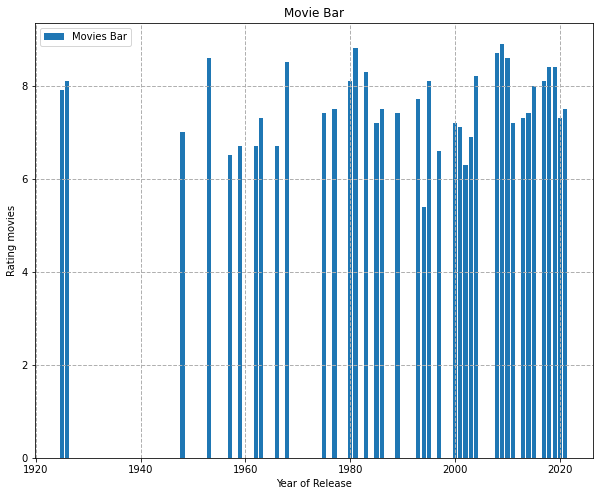

In [143]:
# visualizations

plt.figure(figsize=(10, 8))
plt.bar(movie_year, movie_rating, label = 'Movies Bar')
plt.xlabel('Year of Release')
plt.ylabel('Rating movies')
plt.title('Movie Bar')
plt.legend()
plt.grid(True, linestyle ='--', linewidth = 1)
plt.show()


In [144]:
# converted movie duration into int

converted_duration = []
for i in movie_runtime:
    duration = int(i.replace('min', ""))
    converted_duration.append(duration)
print(converted_duration)

[106, 100, 148, 131, 116, 115, 155, 110, 156, 124, 126, 163, 132, 121, 181, 129, 242, 169, 130, 132, 148, 97, 152, 152, 178, 120, 133, 153, 121, 149, 141, 134, 137, 117, 108, 129, 169, 142, 127, 131, 119, 132, 132, 134, 121, 145, 121, 162, 93, 134]


In [145]:
# normalized value

df = pd.DataFrame({
               'Rating': movie_rating,
               'Duration': converted_duration
              })
normalized_df = (df - df.min()) / (df.max() - df.min())
print(normalized_df)


      Rating  Duration
0   0.428571  0.087248
1   0.485714  0.046980
2   0.914286  0.369128
3   0.257143  0.255034
4   0.371429  0.154362
5   0.514286  0.147651
6   0.771429  0.416107
7   0.600000  0.114094
8   0.285714  0.422819
9   0.514286  0.208054
10  0.600000  0.221477
11  0.542857  0.469799
12  0.514286  0.261745
13  0.000000  0.187919
14  0.857143  0.590604
15  0.657143  0.241611
16  0.771429  1.000000
17  0.942857  0.510067
18  0.342857  0.248322
19  0.600000  0.261745
20  0.971429  0.369128
21  0.171429  0.026846
22  0.628571  0.395973
23  0.314286  0.395973
24  1.000000  0.570470
25  0.771429  0.181208
26  0.571429  0.268456
27  0.828571  0.402685
28  0.571429  0.187919
29  0.885714  0.375839
30  0.371429  0.322148
31  0.371429  0.275168
32  0.257143  0.295302
33  0.857143  0.161074
34  0.742857  0.100671
35  0.542857  0.241611
36  0.685714  0.510067
37  0.514286  0.328859
38  0.800000  0.228188
39  0.114286  0.255034
40  0.657143  0.174497
41  0.342857  0.261745
42  0.54285

In [149]:
# join scraped data into a dataframe

imdb_movie = pd.DataFrame({ 'Movie Name' : movie_name,
               'Yaer of Release': movie_year,
                'Duration': movie_runtime,
                'Genre': movie_genre,
                'Rating': movie_rating,
                 })

imdb_movie

,Movie Name,Yaer of Release,Duration,Genre,Rating
0,The Adam Project,2022,106 min,"Action, Adventure, Comedy",6.9
1,Rot,2022,100 min,"Animation, Adventure, Comedy",7.1
2,Spider-Man: No Way Home,2021,148 min,"Action, Adventure, Fantasy",8.6
3,The King's Man,2021,131 min,"Action, Adventure, Thriller",6.3
4,Uncharted,2022,116 min,"Action, Adventure",6.7
5,Free Guy,2021,115 min,"Action, Adventure, Comedy",7.2
6,Dune,2021,155 min,"Action, Adventure, Drama",8.1
7,Sing - Die Show deines Lebens,2021,110 min,"Animation, Adventure, Comedy",7.5
8,Eternals,2021,156 min,"Action, Adventure, Fantasy",6.4
9,Ghostbusters: Legacy,2021,124 min,"Adventure, Comedy, Fantasy",7.2
